1. Importing data science libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import sys
import os
import seaborn as sns 
import ipywidgets as widgets
from collections import Counter
plt.style.use('seaborn-v0_8-deep')
sys.version
pd.__version__
mpl.__version__
# mpl.style.available

'3.8.0'

2. Importing data

In [3]:
data = pd.read_csv("album_ratings.csv")
data

,Artist,Title,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,Neko Case,Middle Cyclone,March,3,2009,LP,ANTI-,Alt-Country,79.0,31.0,8.7,31.0,79,25,78,55
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,LP,Thirty Tigers,Country Rock,70.0,14.0,8.4,7.0,73,11,73,8
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,LP,Domino,Psychedelic Pop,89.0,36.0,8.5,619.0,92,30,87,1335
3,Bruce Springsteen,Working on a Dream,January,27,2009,LP,Columbia Records,Rock,72.0,29.0,7.9,101.0,70,23,66,38
4,Andrew Bird,Noble Beast,January,20,2009,LP,Fat Possum,Singer-Songwriter,79.0,29.0,8.7,47.0,74,24,78,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32353,Death Valley Girls,Under the Spell of Joy,October,2,2020,LP,Suicide Squeeze,NaN,70.0,7.0,NaN,NaN,67,7,63,3
32354,Gorillaz,"Song Machine, Season One: Strange Timez",October,23,2020,LP,NaN,NaN,80.0,11.0,9.3,44.0,75,8,94,4
32355,Tobin Sprout,Empty Horses,September,18,2020,LP,Fire,NaN,77.0,5.0,NaN,NaN,79,5,64,4
32356,Jeremy Ivey,Waiting out the Storm,October,16,2020,LP,ANTI-,NaN,82.0,4.0,NaN,NaN,77,3,64,3


In [4]:
print(data.info)

<bound method DataFrame.info of                             Artist                                    Title  \
0                        Neko Case                           Middle Cyclone   
1      Jason Isbell & The 400 Unit              Jason Isbell & The 400 Unit   
2                Animal Collective               Merriweather Post Pavilion   
3                Bruce Springsteen                       Working on a Dream   
4                      Andrew Bird                              Noble Beast   
...                            ...                                      ...   
32353           Death Valley Girls                   Under the Spell of Joy   
32354                     Gorillaz  Song Machine, Season One: Strange Timez   
32355                 Tobin Sprout                             Empty Horses   
32356                  Jeremy Ivey                    Waiting out the Storm   
32357                Delmer Darion                         Morning Pageants   

      Release Month

3. Metacritic Critic Score data research

In [15]:
meta_critic_score = data[["Artist", "Title", "Release Year", "Genre", "Metacritic Critic Score"]]
meta_critic_score = meta_critic_score.dropna()


In [21]:
top100_metacritic_score = meta_critic_score.sort_values(by=['Metacritic Critic Score'], ascending=False).head(100)
top100_metacritic_score

,Artist,Title,Release Year,Genre,Metacritic Critic Score
28053,Fiona Apple,Fetch the Bolt Cutters,2020,Art Pop,98.0
381,Brian Wilson,SMiLE,2004,Rock,97.0
382,Loretta Lynn,Van Lear Rose,2004,Country,97.0
7090,The Wonder Years,The Greatest Generation,2013,Pop Punk,97.0
12575,Kendrick Lamar,To Pimp a Butterfly,2015,Hip Hop,96.0
...,...,...,...,...,...
26440,Angel Olsen,All Mirrors,2019,Art Pop,89.0
422,Queens of the Stone Age,Songs for the Deaf,2002,Alternative Rock,89.0
27885,Christine and the Queens,La vita nuova,2020,Synthpop,89.0
24002,ROSALÃA,EL MAL QUERER,2018,Art Pop,89.0


3.1. Top 100 albums based on Metacritic Critic Score

In [22]:
top100_metacritic_score.to_csv('top100_metacritic_score.txt', sep='\t', index=False)

In [23]:
genre_count = top100_metacritic_score['Genre'].value_counts()
genre_count

Genre
Hip Hop              17
Art Pop               8
Singer-Songwriter     8
Indie Rock            5
Metalcore             5
Folk                  2
Synthpop              2
Chamber Pop           2
Alternative Rock      2
Death Metal           2
R&B                   2
Alternative R&B       2
World                 2
Jazz                  2
Stoner Metal          2
Country               2
Pop Punk              2
Neo-Soul              2
Post-Hardcore         2
Alternative Metal     1
Electropop            1
Post-Industrial       1
Latin Pop             1
Indie Folk            1
Dancehall             1
Indie Pop             1
Blues Rock            1
Ambient               1
Minimal Techno        1
Alternative Dance     1
Country Rock          1
Grindcore             1
Dubstep               1
Thrash Metal          1
UK Hip Hop            1
Emo                   1
Noise Rock            1
Grime                 1
Rock                  1
Gothic Metal          1
Art Rock              1
Garage Roc

In [24]:
avg_score_genre = top100_metacritic_score.groupby('Genre')['Metacritic Critic Score'].mean()
avg_score_genre

Genre
Alternative Dance    90.00
Alternative Metal    89.00
Alternative R&B      90.50
Alternative Rock     89.50
Ambient              90.00
Americana            92.00
Art Pop              91.00
Art Rock             95.00
Blackgaze            92.00
Blues Rock           89.00
Chamber Pop          89.50
Country              94.00
Country Rock         95.00
Dancehall            90.00
Death Metal          91.50
Dubstep              90.00
Electropop           89.00
Emo                  91.00
Folk                 93.00
Garage Rock          92.00
Gothic Metal         92.00
Grime                92.00
Grindcore            89.00
Hip Hop              92.00
Indie Folk           90.00
Indie Pop            89.00
Indie Rock           91.20
Jazz                 91.00
Latin Pop            89.00
Mathcore             92.00
Metalcore            91.60
Minimal Techno       90.00
Neo-Soul             92.50
Noise Rock           92.00
Pop Punk             94.00
Post-Hardcore        92.00
Post-Industrial      8

In [26]:
artist_count = top100_metacritic_score['Artist'].value_counts()
artist_count

Artist
Kendrick Lamar               3
Fiona Apple                  2
The Wonder Years             2
Nick Cave & The Bad Seeds    2
The Streets                  2
                            ..
BeyoncÃ©                     1
UnderÃ¸ath                   1
Leonard Cohen                1
The White Stripes            1
FKA twigs                    1
Name: count, Length: 91, dtype: int64

4. Researching the whole data

In [29]:
data = data[["Artist", "Title", "Release Month", "Release Day", "Release Year", "Genre", "AOTY Critic Score", "AOTY User Score"]].dropna()
data

,Artist,Title,Release Month,Release Day,Release Year,Genre,AOTY Critic Score,AOTY User Score
0,Neko Case,Middle Cyclone,March,3,2009,Alt-Country,79,78
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,Country Rock,73,73
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,Psychedelic Pop,92,87
3,Bruce Springsteen,Working on a Dream,January,27,2009,Rock,70,66
4,Andrew Bird,Noble Beast,January,20,2009,Singer-Songwriter,74,78
...,...,...,...,...,...,...,...,...
32319,Mike Doughty,The Flip Is Another Honey,November,6,2012,Singer-Songwriter,70,60
32323,Lemuria,The Distance Is So Big,June,18,2013,Power Pop,69,60
32332,Firewater,The Golden Hour,May,6,2008,Indie Rock,72,60
32341,Grant-Lee Phillips,"Lightning, Show Us Your Stuff",September,4,2020,Singer-Songwriter,78,69


In [30]:
data['Average Score'] = data[['AOTY Critic Score', 'AOTY User Score']].mean(axis=1)
data

,Artist,Title,Release Month,Release Day,Release Year,Genre,AOTY Critic Score,AOTY User Score,Average Score
0,Neko Case,Middle Cyclone,March,3,2009,Alt-Country,79,78,78.5
1,Jason Isbell & The 400 Unit,Jason Isbell & The 400 Unit,February,17,2009,Country Rock,73,73,73.0
2,Animal Collective,Merriweather Post Pavilion,January,20,2009,Psychedelic Pop,92,87,89.5
3,Bruce Springsteen,Working on a Dream,January,27,2009,Rock,70,66,68.0
4,Andrew Bird,Noble Beast,January,20,2009,Singer-Songwriter,74,78,76.0
...,...,...,...,...,...,...,...,...,...
32319,Mike Doughty,The Flip Is Another Honey,November,6,2012,Singer-Songwriter,70,60,65.0
32323,Lemuria,The Distance Is So Big,June,18,2013,Power Pop,69,60,64.5
32332,Firewater,The Golden Hour,May,6,2008,Indie Rock,72,60,66.0
32341,Grant-Lee Phillips,"Lightning, Show Us Your Stuff",September,4,2020,Singer-Songwriter,78,69,73.5


In [32]:
genre_count = data['Genre'].value_counts().head(10)
genre_count

Genre
Hip Hop              1710
Indie Rock           1631
Indie Pop            1022
Alternative Rock     1014
Singer-Songwriter     944
Pop Rock              807
Electronic            519
Art Pop               460
Folk                  454
Synthpop              413
Name: count, dtype: int64

In [33]:
avg_score_genre = data.groupby("Genre")['Average Score'].mean()

Genre
AOR                 62.500000
Abstract Hip Hop    73.979592
Acid House          77.090909
Acid Jazz           71.083333
Acid Techno         71.833333
                      ...    
Witch House         73.000000
Wonky               72.048780
World               77.312500
Yacht Rock          74.500000
YÃ©-yÃ©             77.166667
Name: Average Score, Length: 292, dtype: float64

In [34]:
albums_per_year = data['Release Year'].value_counts().sort_index()
albums_per_year

Release Year
1940       1
1946       1
1951       2
1952       4
1953       1
        ... 
2016    1462
2017    1562
2018    1668
2019    1551
2020    1245
Name: count, Length: 72, dtype: int64

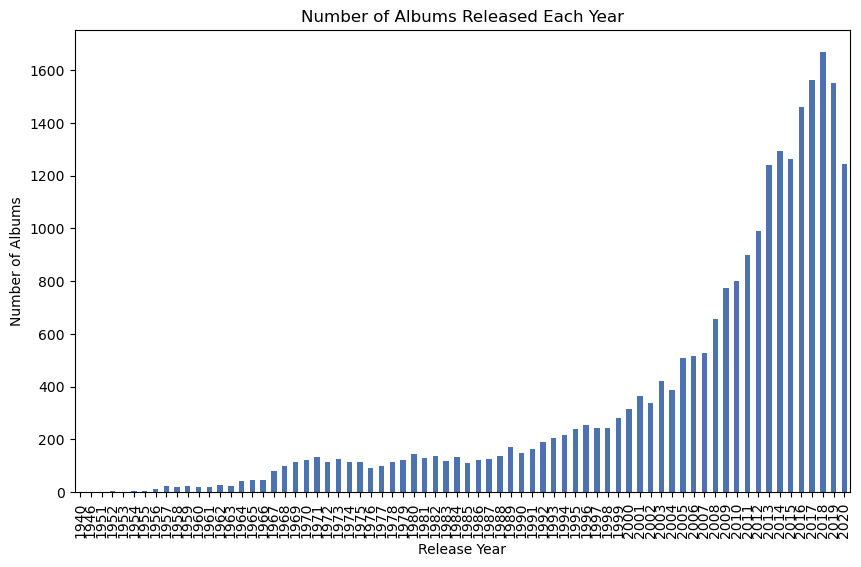

In [35]:
plt.figure(figsize=(10,6))
albums_per_year.plot(kind='bar')
plt.title("Number of Albums Released Each Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Albums")
plt.show()

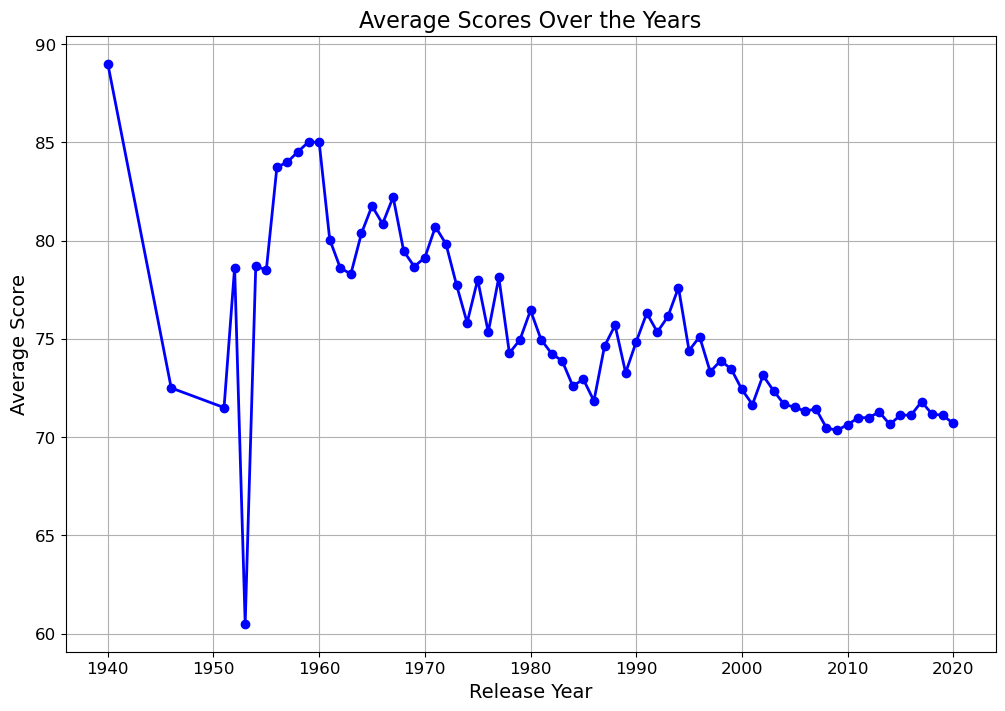

In [37]:
avg_score_year = data.groupby("Release Year")['Average Score'].mean()

plt.figure(figsize=(12, 8))  
plt.plot(avg_score_year, marker='o', linestyle='-', color='b', linewidth=2, markersize=6) 
plt.title('Average Scores Over the Years', fontsize=16)  
plt.xlabel('Release Year', fontsize=14) 
plt.ylabel('Average Score', fontsize=14) 
plt.grid(True)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  

plt.show()

In [60]:
genre_counts = data['Genre'].value_counts().head(50)
genre_counts

Genre
Hip Hop              1710
Indie Rock           1631
Indie Pop            1022
Alternative Rock     1014
Singer-Songwriter     944
Pop Rock              807
Electronic            519
Art Pop               460
Folk                  454
Synthpop              413
Post-Punk             379
Pop                   370
R&B                   367
Hard Rock             362
Electropop            325
Psychedelic Rock      322
Ambient               304
Indie Folk            292
Country               285
Dream Pop             256
Rock                  250
Post-Rock             232
Soul                  231
Trap Rap              227
Alternative R&B       226
Jazz                  224
Death Metal           221
Progressive Rock      215
Post-Hardcore         211
Garage Rock           204
Neo-Psychedelia       202
Noise Rock            194
Punk Rock             194
Progressive Metal     187
Alt-Country           181
Experimental          174
Pop Punk              170
Heavy Metal           163
Shoega

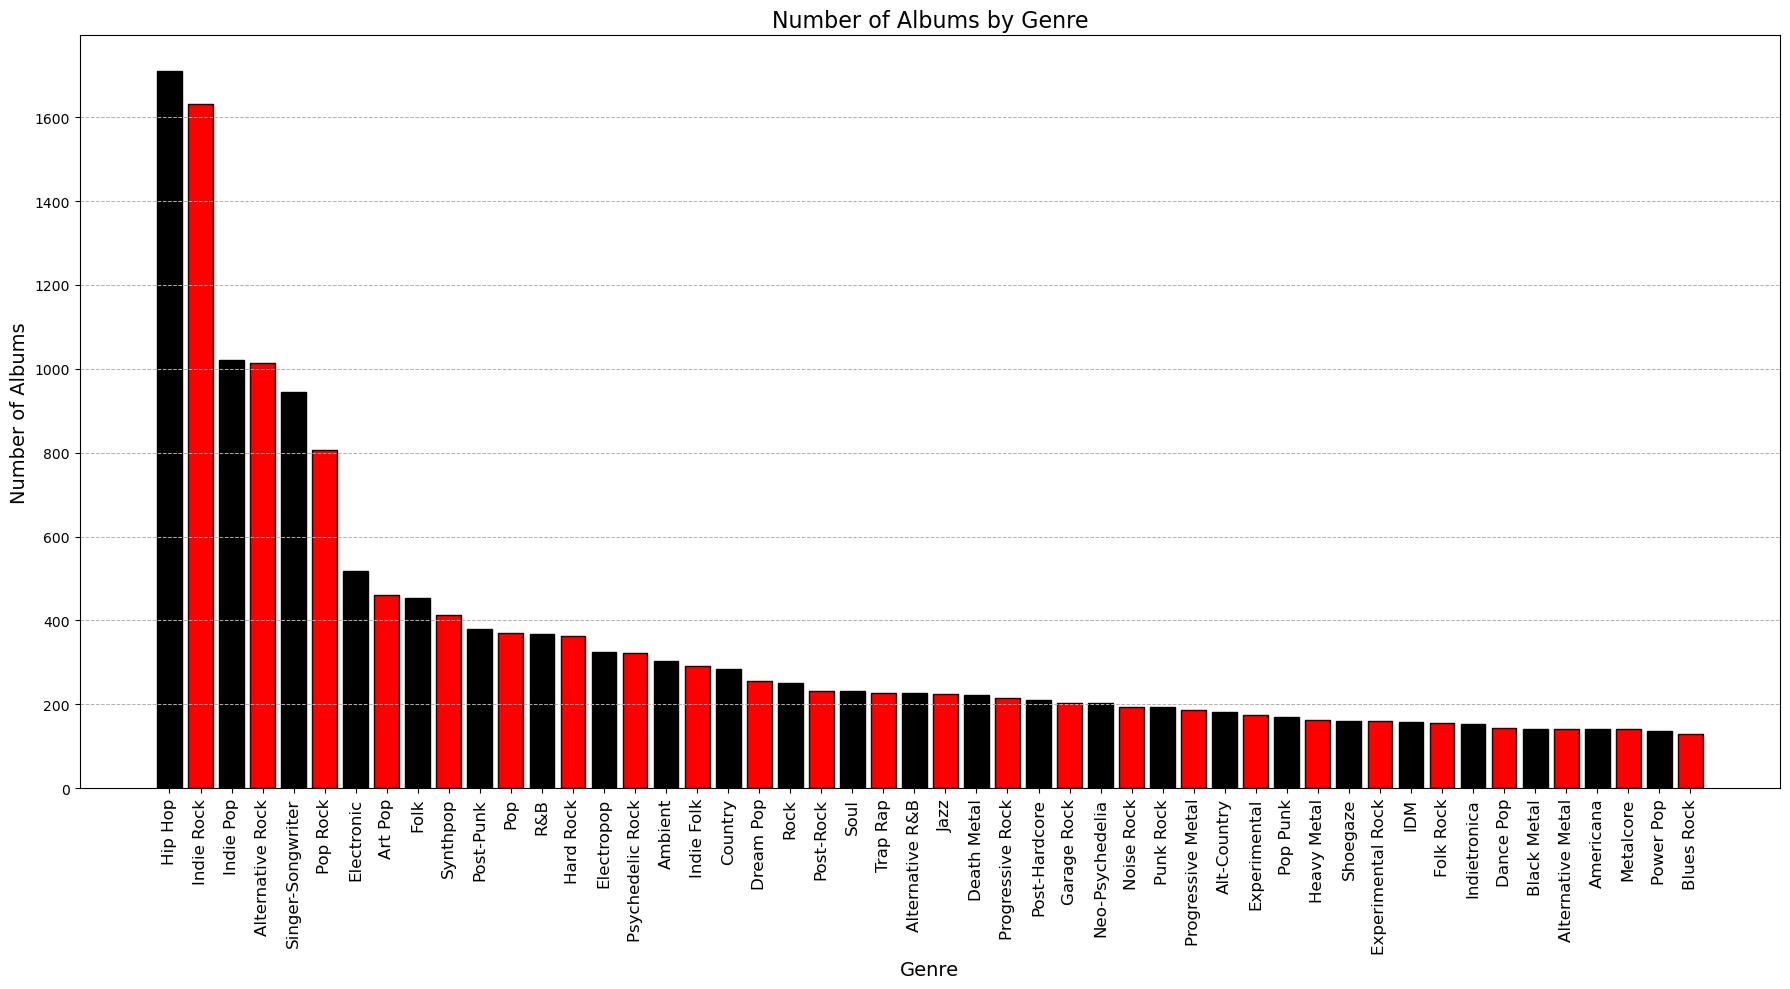

In [61]:


# Create a bar chart
plt.figure(figsize=(18, 10))  # Increased figure size for better readability

# Use a black-red color palette
colors = ['black' if (i % 2 == 0) else 'red' for i in range(len(genre_counts))]

bars = plt.bar(genre_counts.index, genre_counts.values, color=colors)

# Set the title and labels
plt.title('Number of Albums by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Albums', fontsize=14)

# Rotate x-axis labels to be more readable
plt.xticks(rotation=90, fontsize=12)  # Adjusted rotation to 90 degrees

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Adding edge color to the bars for better contrast
for bar in bars:
    bar.set_edgecolor('black')

# Adjust layout to make room for the rotated x-axis labels
plt.tight_layout()

# Show plot
plt.show()